## BASIC DATA

In [22]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
advertising=pd.read_csv("datasets_309_669_Advertising.csv")

In [3]:
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
#check null
advertising.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [6]:
#number of data
advertising.shape

(200, 5)

## ANALYZE THE DATA

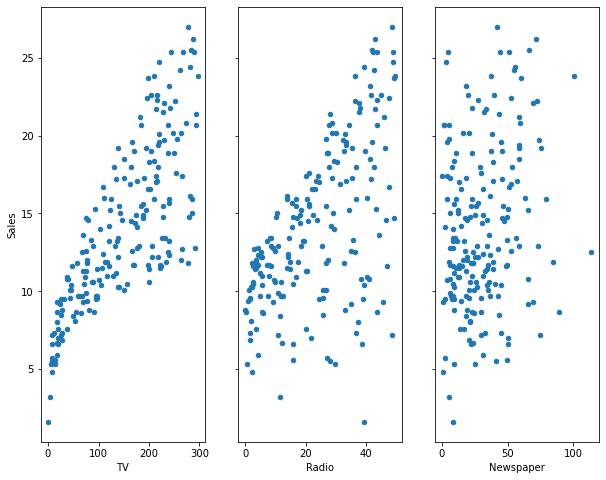

In [7]:
#features-TV,Radio,Newspaper sales-to be predicted variable
fig, axs = plt.subplots(1, 3, sharey=True)
advertising.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 8))
advertising.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
advertising.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

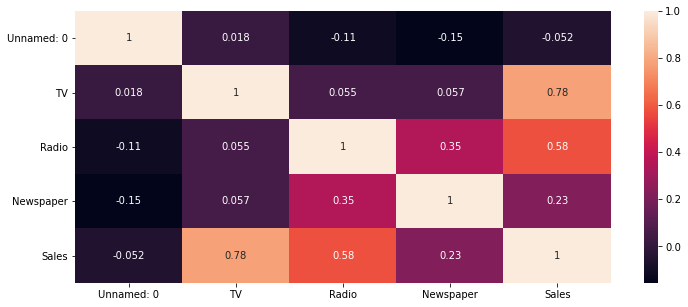

In [23]:
#correlation
plt.figure(figsize=(12,5))
sns.heatmap(advertising.corr(),annot=True)
plt.show()

TV has highest correlation with sales followed radio and least is newspaper

## FITTING LINEAR REGRESSION MODELS 

### FOR TV

In [8]:
feature=['TV']
X=advertising[feature]
Y=advertising['Sales']
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
# print intercept
print(lm.intercept_)
print(lm.coef_)

7.032593549127695
[0.04753664]


## Intepretation

A "unit" increase in spends on a TV ad is associated with a 0.04753664 "unit" increase in Sales.
Or, an additional $1,000 on TV ads is translated to an increase in sales by 47.53 Dollars.


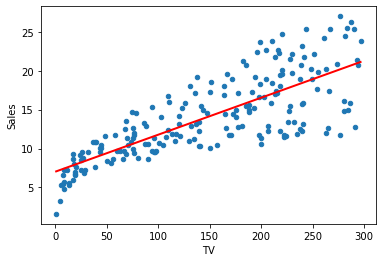

In [9]:
X_new = pd.DataFrame({'TV': [50]})
lm.predict(X_new)
X_new = pd.DataFrame({'TV': [advertising.TV.min(), advertising.TV.max()]})
preds = lm.predict(X_new)
advertising.plot(kind="scatter",x='TV',y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

### FOR NEWSPAPER

In [11]:
feature=['Newspaper']
X=advertising[feature]
Y=advertising['Sales']
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
# print intercept
print(lm.intercept_)
print(lm.coef_)

12.35140706927816
[0.0546931]


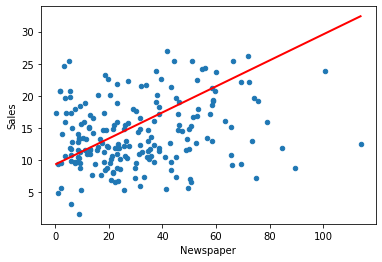

In [18]:
X_new = pd.DataFrame({'Newspaper': [50]})
lm.predict(X_new)
X_new = pd.DataFrame({'Newspaper': [advertising.Newspaper.min(), advertising.Newspaper.max()]})
preds = lm.predict(X_new)
advertising.plot(kind="scatter",x='Newspaper',y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

## FOR RADIO

In [19]:
feature=['Radio']
X=advertising[feature]
Y=advertising['Sales']
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
# print intercept
print(lm.intercept_)
print(lm.coef_)

9.311638095158283
[0.20249578]


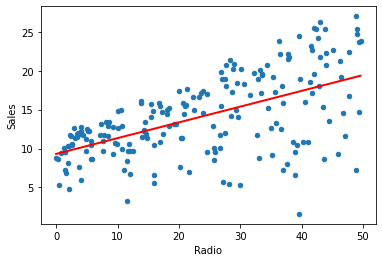

In [20]:
X_new = pd.DataFrame({'Radio': [50]})
lm.predict(X_new)
X_new = pd.DataFrame({'Radio': [advertising.Radio.min(), advertising.Radio.max()]})
preds = lm.predict(X_new)
advertising.plot(kind="scatter",x='Radio',y='Sales')
plt.plot(X_new, preds, c='red', linewidth=2)

## MULTIPLE LINEAR REGRESSION

In [25]:
features=['TV','Radio','Newspaper']
X=advertising[features]
Y=advertising.Sales
lm = LinearRegression()
lm.fit(X, Y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


## INTEPRETATION

In [28]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        17:09:05   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## CONCLUSION

TV and Radio have positive p-values, whereas Newspaper has a negative one. Hence, we can reject the null hypothesis for TV and Radio that there is no relation between those features and Sales, but we fail to reject the null hypothesis for Newspaper that there is no relationship between newspaper spends and sales.

This model has a higher value of R-squared (0.903) than the previous model, which means that this model explains more variance and provides a better fit to the data than a model that only includes the TV

## FEATURE SELECTION

In [30]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=advertising).fit()
lm.rsquared

0.8971942610828957

## CONCLUSION

Tv and Radio affect the sales and most prominent is TV